In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


Classification problem: Breast cancer data

Breast cancer data from python package was chosen for the decision tree modeling. For simplication, we chose the only two features for the dataset, including mean radius and mean concavity. 

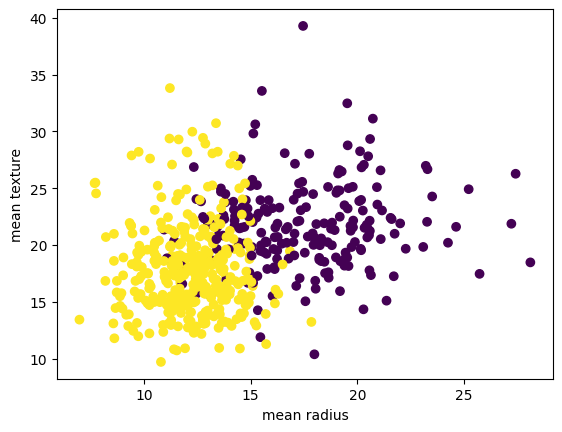

In [6]:
# Load the dataset of breast cancer first. 
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_subset = X[['mean radius', 'mean texture']]

# Plot the dataset based on mean radius and mean texture.
plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:,1], c=y)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

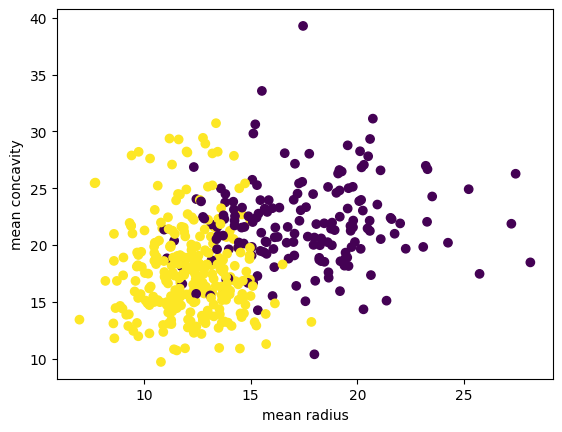

In [7]:
# Separate data into train and test.
X_train, X_test,y_train,y_test = train_test_split(X_subset,y,test_size = 0.2,random_state =50)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:,1], c = y_train)
plt.xlabel('mean radius')
plt.ylabel('mean concavity')
plt.show()

In [8]:
# Train the datasets
decision_tree=DecisionTreeClassifier(max_depth = 2, random_state = 50)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=50)

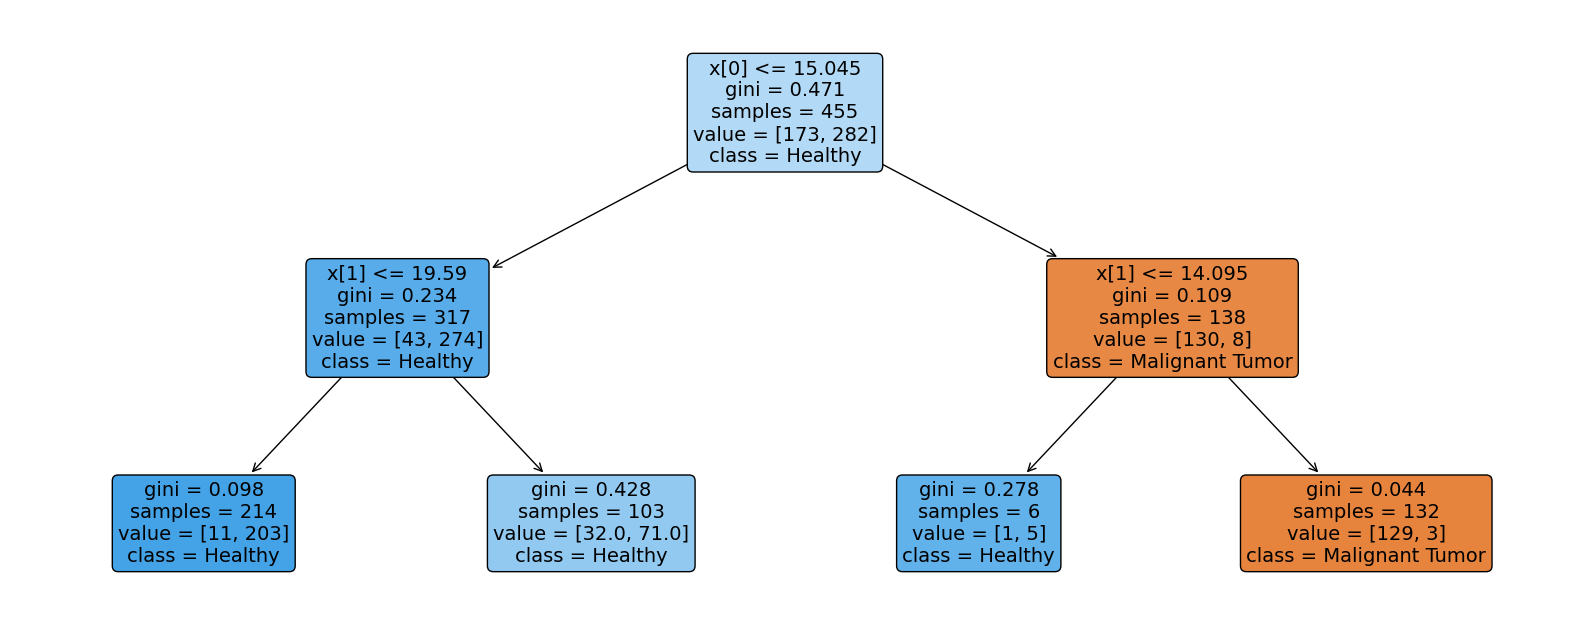

In [10]:
# Plot the decision tree
from sklearn import tree

# Define feature names if available
features = ["radius", "texture"]

# Define class names if available
class_names = [ "Malignant Tumor","Healthy"]  # Example class names, replace with your actual class names

# Plot the decision tree
plt.figure(figsize = (20, 8))
tree.plot_tree(decision_tree,
               # feature_names=features,
               class_names = class_names,
               rounded = True,
               filled = True,
               fontsize = 14)
plt.show()

In [11]:
# Show the result of tree by text
tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- radius <= 15.05
|   |--- texture <= 19.59
|   |   |--- class: 1
|   |--- texture >  19.59
|   |   |--- class: 1
|--- radius >  15.05
|   |--- texture <= 14.10
|   |   |--- class: 1
|   |--- texture >  14.10
|   |   |--- class: 0



/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


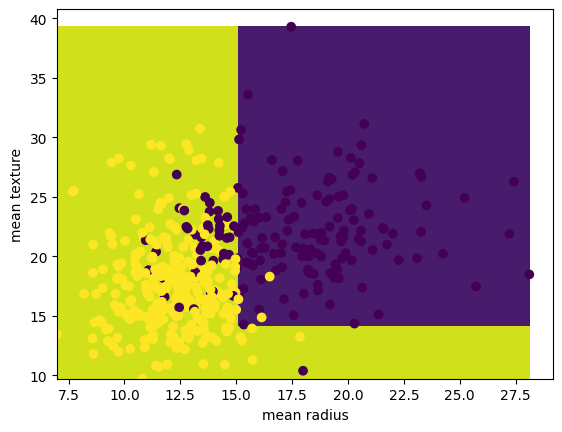

In [12]:
# Set a plot_step
plot_step = 0.02

# Plot the decision boundary
x_min, x_max = X_subset.iloc[:, 0].min(), X_subset.iloc[:, 0].max() 
y_min, y_max = X_subset.iloc[:, 1].min(), X_subset.iloc[:, 1].max() 

xx,yy= np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs= plt.contourf(xx,yy,Z)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:,1], c = y_train)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

The Confusion Matrix

- True Positives (TP): Instances that were correctly predicted as positive by the model.

- False Positives (FP): Instances that were incorrectly predicted as positive by the model (predicted positive but actually negative).

- False Negatives (FN): Instances that were incorrectly predicted as negative by the model (predicted negative but actually positive).
- True Negatives (TN): Instances that were correctly predicted as negative by the model.

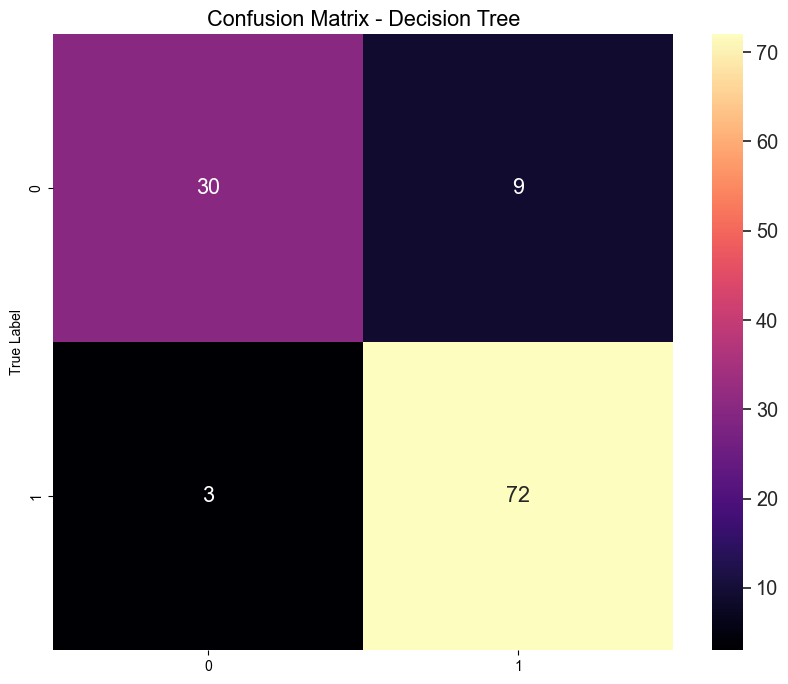

In [13]:
labels = ["radius", "concavity"]

# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot=True,
           fmt="g",
           ax=ax,
           cmap="magma")

ax.set_title("Confusion Matrix - Decision Tree")
#ax.set_xlabel(labels)
ax.set_ylabel("True Label",fontsize=10)
#ax.set_yticklabels(labels,rotation=0)
plt.show()

Accuracy Score

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

In [15]:
print(f"accuracy score={metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score=0.8947368421052632


Precision Score

Precision tells us the proportion of positive identifications that were actually correct. It measures how many of the values we predicted to be in a certain class are actually in that class.

$$
\text{Precision Score} = \frac{TP}{TP + FP}
$$

In [17]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision)
precision_results.rename(columns = {0:"precision"},inplace = True)
precision_results

precision score


,precision
0,0.909091
1,0.888889


Recall

Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. Proportion of actual positives was identified correctly.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

The F1 score is the harmonic mean of the precision and recall.

$$
F_1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{tp}{tp + \frac{1}{2} (fp + fn)}
$$

In [18]:
# Recall and the f1-score (look them up!)

print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        39
           1       0.89      0.96      0.92        75

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114



## Performance Report for Decision Tree Classifier

The decision tree classifier was trained on the breast cancer dataset using scikit-learn. Below are the key evaluation metrics obtained from the classification report:

1. **Precision**: Precision measures the proportion of correctly predicted positive cases out of all predicted positive cases. 

   - For class 0 (negative cases): Precision is 0.91, indicating that 91% of the cases predicted as negative were actually negative.
   - For class 1 (positive cases): Precision is 0.89, indicating that 89% of the cases predicted as positive were actually positive.

2. **Recall**: Recall measures the proportion of correctly predicted positive cases out of all actual positive cases.

   - For class 0 (negative cases): Recall is 0.77, indicating that 77% of the actual negative cases were correctly predicted as negative.
   - For class 1 (positive cases): Recall is 0.96, indicating that 96% of the actual positive cases were correctly predicted as positive.

3. **F1-score**: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

   - For class 0 (negative cases): F1-score is 0.83.
   - For class 1 (positive cases): F1-score is 0.92.

4. **Accuracy**: Accuracy measures the proportion of correctly classified cases out of all cases.

   - Accuracy is 0.89, indicating that 89% of the cases were correctly classified by the model.

5. **Macro Average**: Macro average calculates the average of the metrics (precision, recall, and F1-score) for each class without considering class imbalance.

   - Macro average precision is 0.90.
   - Macro average recall is 0.86.
   - Macro average F1-score is 0.88.

6. **Weighted Average**: Weighted average calculates the average of the metrics, weighted by the support (number of true instances for each label).

   - Weighted average precision is 0.90.
   - Weighted average recall is 0.89.
   - Weighted average F1-score is 0.89.

**Conclusion**:

The decision tree classifier achieved overall satisfactory performance on the breast cancer dataset, with high precision, recall, and F1-score for both classes. The model demonstrated a good ability to differentiate between positive and negative cases of breast cancer, as evidenced by the high recall values. The overall accuracy of 89% indicates that the model is effective in making correct predictions on unseen data.
